In [1]:
# For this practical example we will need the following libraries and modules
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('Cars-Dataset-Cleaned.csv')
df_cleaned = raw_data.copy()
df_cleaned.head()

,Unnamed: 0,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
0,0,BMW,4200.0,sedan,277,2.0,Petrol,1991
1,1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,1999
2,2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,2003
3,3,Audi,23000.0,crossover,240,4.2,Petrol,2007
4,4,Toyota,18300.0,crossover,120,2.0,Petrol,2011


In [3]:
df_cleaned.drop(['Unnamed: 0'], axis = 1, inplace = True)
df_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,2011


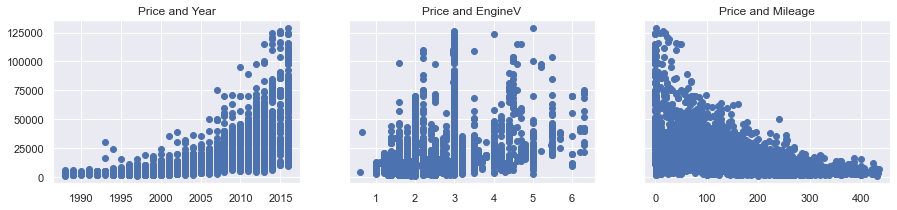

In [4]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(df_cleaned['Year'],df_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(df_cleaned['EngineV'],df_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(df_cleaned['Mileage'],df_cleaned['Price'])
ax3.set_title('Price and Mileage')
plt.show()

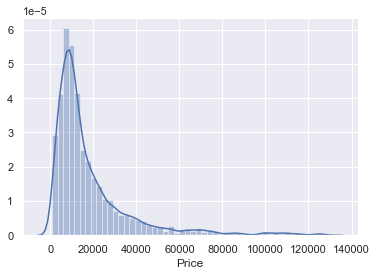

In [5]:
sns.distplot(df_cleaned['Price'])

In [6]:
log_price = np.log(df_cleaned['Price'])
df_cleaned['log_price'] = log_price
df_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,2011,9.814656
...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,1999,8.779557


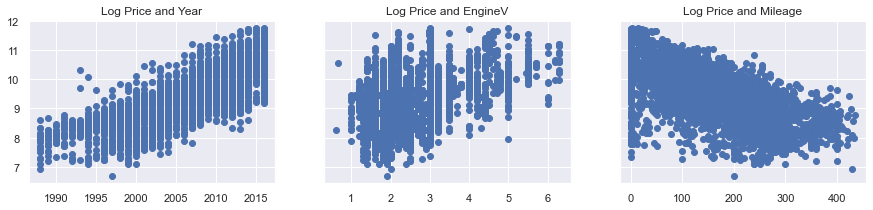

In [7]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(df_cleaned['Year'],df_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(df_cleaned['EngineV'],df_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(df_cleaned['Mileage'],df_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')
plt.show()

In [8]:
df_cleaned.drop(['Price'],axis=1, inplace = True)
df_cleaned.head()

,Brand,Body,Mileage,EngineV,Engine Type,Year,log_price
0,BMW,sedan,277,2.0,Petrol,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,2011,9.814656


In [9]:
df_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type', 'Year',
       'log_price'], dtype=object)

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [11]:
vif

,VIF,Features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df_cleaned[['Mileage','EngineV']]
vif_1 = pd.DataFrame()
vif_1["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif_1["Features"] = variables.columns

In [13]:
vif_1

,VIF,Features
0,2.805214,Mileage
1,2.805214,EngineV


In [14]:
df_no_multicollinearity = df_cleaned.drop(['Year'],axis=1)
df_no_multicollinearity.head()

,Brand,Body,Mileage,EngineV,Engine Type,log_price
0,BMW,sedan,277,2.0,Petrol,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,9.495519
3,Audi,crossover,240,4.2,Petrol,10.043249
4,Toyota,crossover,120,2.0,Petrol,9.814656


In [15]:
df_with_dummies = pd.get_dummies(df_no_multicollinearity, drop_first = True)

In [16]:
df_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [17]:
df_with_dummies.columns

Index(['Mileage', 'EngineV', 'log_price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol'],
      dtype='object')

In [18]:
columns = ['log_price','Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol']

In [19]:
df_preprocessed = df_with_dummies[columns]
df_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [21]:
df_preprocessed.to_csv('df-Preprocessed.csv')